# Run kA-means clustering 
on the velocity vectors $v[t]$ and consider the kA resulting cluster centroids 
to be the action primitives $a_i$.

In [6]:
import csv
import numpy as np
import numpy.random as rnd 
import networkx as nx


x,y,z = [], [], []

with open("q3dm1-path2.csv",'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))
        z.append(float(row[2]))

data = np.vstack((x,y,z))
data.shape

matX = data

In [7]:
### compute the velocities in matV
print(matX.shape)
print(matX[2])
matV = matX[:, 1:1287] - matX[:, 0:1286]
print(matV[2,:])

(3, 1288)
[24.125 24.125 24.125 ... 24.125 24.125 24.125]
[0. 0. 0. ... 0. 0. 0.]


In [8]:
from scipy.cluster.vq import vq, kmeans, whiten
from numpy import random

#number of cluster centers 5
cluster_number = 5
#idx = rnd.randint(0, matV.shape[1]-1, size=cluster_number)
#init_cluster_centers = matX[:,idx]
centers, _ = kmeans(matV.T, cluster_number)
print(centers.shape)



(5, 3)


<IPython.core.display.Javascript object>


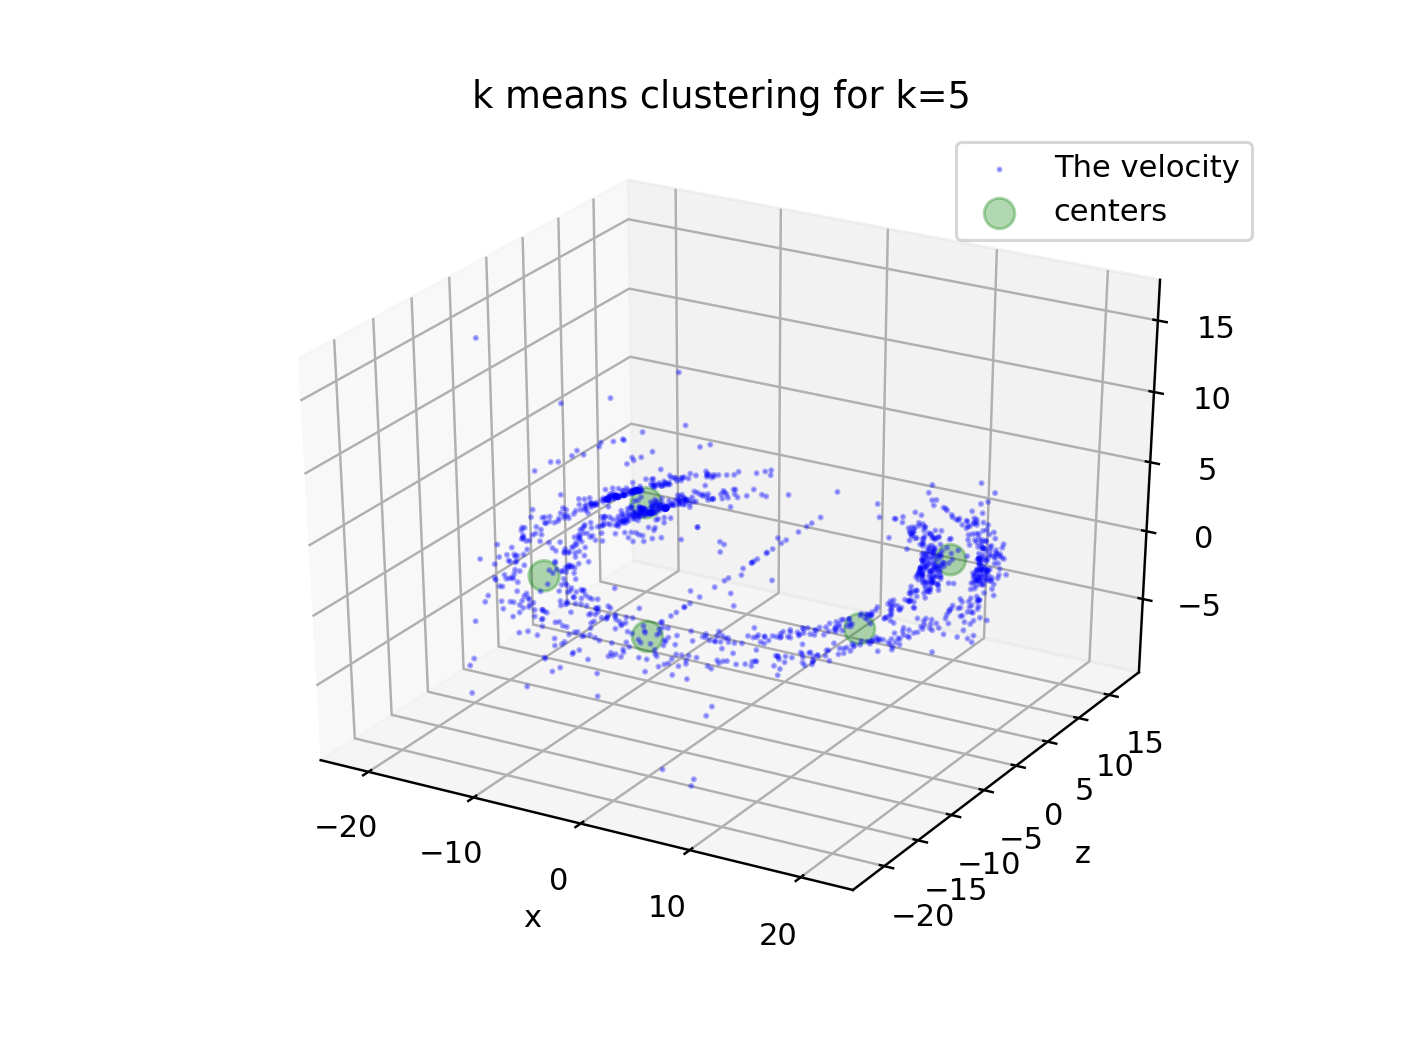

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time
import numpy.random as rnd

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.ion()

fig.show()
fig.canvas.draw()

ax.scatter(matV[0,:], matV[1,:], matV[2,:], color = "blue", alpha=0.3, s= 1,  label='The velocity')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], color = "green", s= 100, alpha=0.3, label='centers')
plt.xlabel('x')
plt.ylabel('y')
plt.ylabel('z')
plt.title('k means clustering for k=' + str(cluster_number))
plt.legend()
fig.canvas.draw()
